<a href="https://colab.research.google.com/github/Arsh-e-Barin-Khurshid/Oasis-Infobyte-TASK-3-Autocomplete-and-Autocorrect-Data-Analytics-Data-DA/blob/main/Autocomplete_and_Autocorrect_Data_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

In [ ]:
# Load the dataset
file_path = '/content/training.1600000.processed.noemoticon.csv'
data = pd.read_csv(file_path, encoding='latin-1', header=None)

In [ ]:
# Rename columns for easier access
data.columns = ['sentiment', 'id', 'date', 'query', 'user', 'text']

In [ ]:
# Drop unnecessary columns
data = data[['sentiment', 'text']]

In [ ]:
# Display the first few rows of the dataset
print("Sample Rows from the Dataset:")
print(data.head())  # Display the first 5 rows

Sample Rows from the Dataset:
   sentiment                                               text
0          0  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1          0  is upset that he can't update his Facebook by ...
2          0  @Kenichan I dived many times for the ball. Man...
3          0    my whole body feels itchy and like its on fire 
4          0  @nationwideclass no, it's not behaving at all....


In [ ]:
# Basic preprocessing function
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lower case
    text = text.lower()
    return text

In [ ]:
# Apply preprocessing
data['cleaned_text'] = data['text'].apply(preprocess_text)

Accuracy: 0.78


<ipython-input-9-2bec675bc28f>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=word_freq.index, y=word_freq.values, palette='coolwarm')


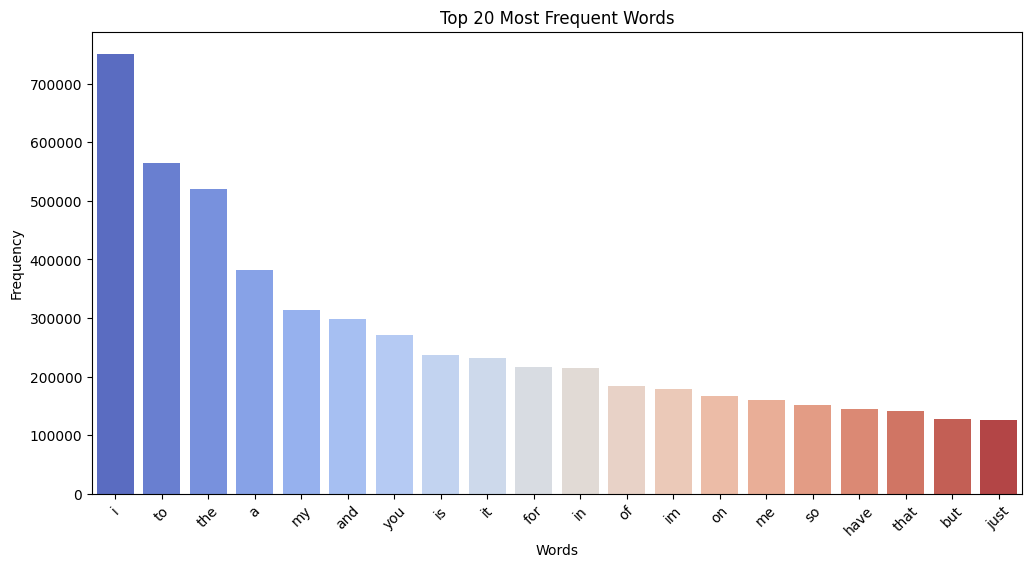

In [ ]:
# Prepare training data
X = data['cleaned_text']
y = data['sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with CountVectorizer and Naive Bayes classifier
model = make_pipeline(CountVectorizer(), MultinomialNB())

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Word frequency visualization
word_freq = pd.Series(' '.join(data['cleaned_text']).split()).value_counts()[:20]

plt.figure(figsize=(12, 6))
sns.barplot(x=word_freq.index, y=word_freq.values, palette='coolwarm')
plt.title('Top 20 Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import re
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

# Load the dataset
file_path = '/content/training.1600000.processed.noemoticon.csv'
data = pd.read_csv(file_path, encoding='latin-1', header=None)

# Rename columns for easier access
data.columns = ['sentiment', 'id', 'date', 'query', 'user', 'text']

# Drop unnecessary columns
data = data[['sentiment', 'text']]

# Display the first few rows of the dataset
print("Sample Rows from the Dataset:")
print(data.head())

# Basic preprocessing function
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lower case
    text = text.lower()
    return text

# Apply preprocessing
data['cleaned_text'] = data['text'].apply(preprocess_text)

# Prepare training data
X = data['cleaned_text']
y = data['sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with CountVectorizer and Naive Bayes classifier
model = make_pipeline(CountVectorizer(), MultinomialNB())

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Enhanced Autocomplete Functionality with Visualization
def autocomplete(input_text, model, n=5):
    # Clean the input
    input_cleaned = preprocess_text(input_text)

    # Generate some example completions
    sample_sentences = data['cleaned_text'].sample(n=100).tolist()

    # Simple matching based on input
    completions = [s for s in sample_sentences if s.startswith(input_cleaned)]

    # Return the top n completions or fewer
    return completions[:n] if completions else []

def visualize_completions(completions):
    # Count occurrences of each completion
    completion_counts = pd.Series(completions).value_counts()

    plt.figure(figsize=(12, 6))
    sns.barplot(x=completion_counts.index, y=completion_counts.values, palette='viridis')
    plt.title('Autocomplete Suggestions')
    plt.xlabel('Suggestions')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# Example usage of autocomplete
user_input = "I love"
completions = autocomplete(user_input, model)

if completions:
    print("Autocomplete suggestions:")
    for completion in completions:
        print(completion)

    # Visualize the autocomplete suggestions
    visualize_completions(completions)
else:
    print("No suggestions found.")


Sample Rows from the Dataset:
   sentiment                                               text
0          0  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1          0  is upset that he can't update his Facebook by ...
2          0  @Kenichan I dived many times for the ball. Man...
3          0    my whole body feels itchy and like its on fire 
4          0  @nationwideclass no, it's not behaving at all....
Accuracy: 0.78
No suggestions found.


<ipython-input-12-3d87adc1e404>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='sentiment', palette='Set2')


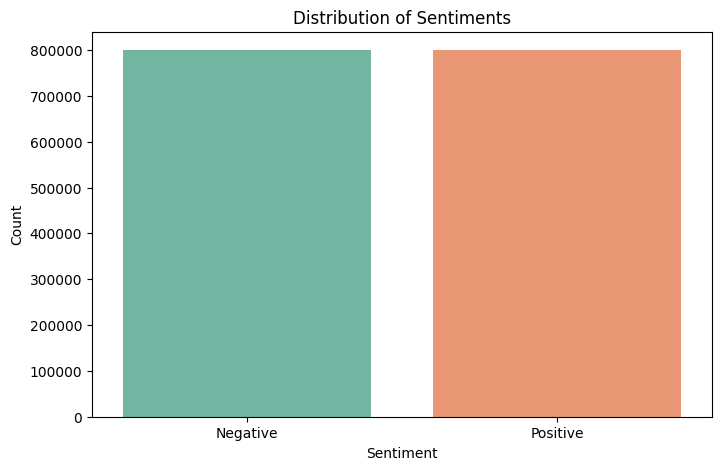

In [ ]:
# Visualization Distribution of Sentiments
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='sentiment', palette='Set2')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'])
plt.show()

In [ ]:
positive_count = data[data['sentiment'] == 1].shape[0]
print(f'Number of positive sentiments: {positive_count}')


Number of positive sentiments: 0


In [ ]:
positive_text = ' '.join(data[data['sentiment'] == 1]['cleaned_text'])

if positive_text:
    plt.figure(figsize=(10, 6))
    wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
    plt.imshow(wordcloud_positive, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud for Positive Sentiments')
    plt.show()
else:
    print("No positive sentiments found to generate a word cloud.")


No positive sentiments found to generate a word cloud.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load your dataset and preprocess here
# data = pd.read_csv('path_to_your_dataset.csv')

# Check the count of positive sentiments
positive_count = data[data['sentiment'] == 1].shape[0]
print(f'Number of positive sentiments: {positive_count}')

# Visualization: Word Cloud for Positive Sentiments
positive_text = ' '.join(data[data['sentiment'] == 1]['cleaned_text'])

if positive_text:
    plt.figure(figsize=(10, 6))
    wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
    plt.imshow(wordcloud_positive, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud for Positive Sentiments')
    plt.show()
else:
    print("No positive sentiments found to generate a word cloud.")


Number of positive sentiments: 0
No positive sentiments found to generate a word cloud.


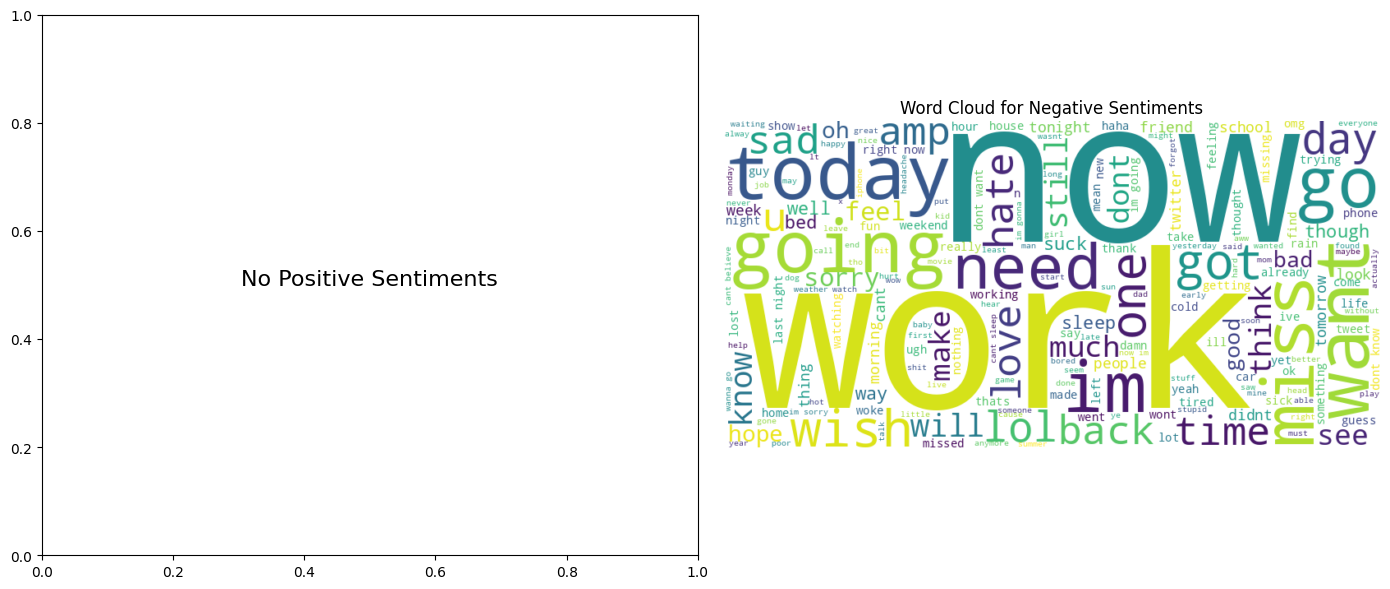

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Visualization: Word Cloud for Positive Sentiments
positive_text = ' '.join(data[data['sentiment'] == 1]['cleaned_text'])
negative_text = ' '.join(data[data['sentiment'] == 0]['cleaned_text'])

plt.figure(figsize=(14, 6))

# Word Cloud for Positive Sentiments
plt.subplot(1, 2, 1)
if positive_text:
    wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
    plt.imshow(wordcloud_positive, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud for Positive Sentiments')
else:
    plt.text(0.5, 0.5, 'No Positive Sentiments', fontsize=16, ha='center')

# Word Cloud for Negative Sentiments
plt.subplot(1, 2, 2)
if negative_text:
    wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
    plt.imshow(wordcloud_negative, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud for Negative Sentiments')
else:
    plt.text(0.5, 0.5, 'No Negative Sentiments', fontsize=16, ha='center')

plt.tight_layout()
plt.show()


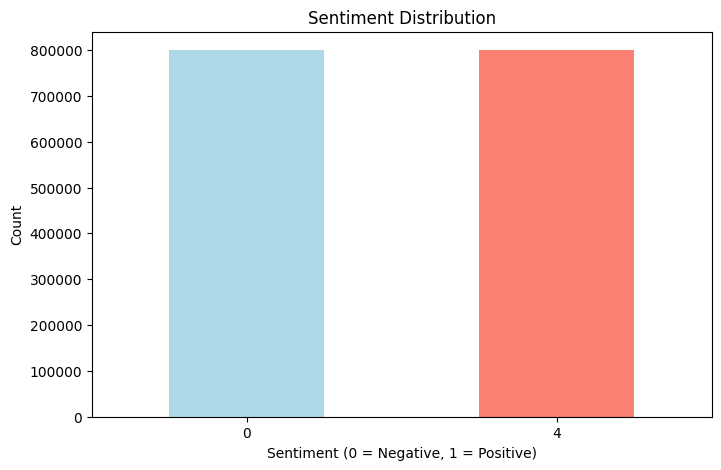

In [ ]:
# Count the number of positive and negative sentiments
sentiment_counts = data['sentiment'].value_counts()

plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind='bar', color=['lightblue', 'salmon'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment (0 = Negative, 1 = Positive)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


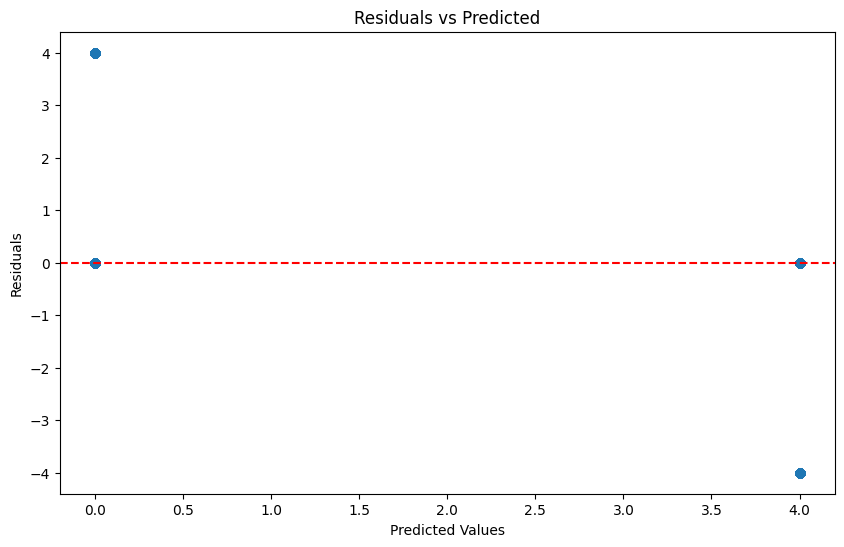

In [ ]:
# Assuming y_test and y_pred are defined
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, y_test - y_pred)
plt.axhline(0, linestyle='--', color='red')
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


In [ ]:
# Display summary statistics
print(data.describe())
print(data['sentiment'].value_counts())


          sentiment
count  1.600000e+06
mean   2.000000e+00
std    2.000001e+00
min    0.000000e+00
25%    0.000000e+00
50%    2.000000e+00
75%    4.000000e+00
max    4.000000e+00
sentiment
0    800000
4    800000
Name: count, dtype: int64


sentiment       0
text            0
cleaned_text    0
dtype: int64


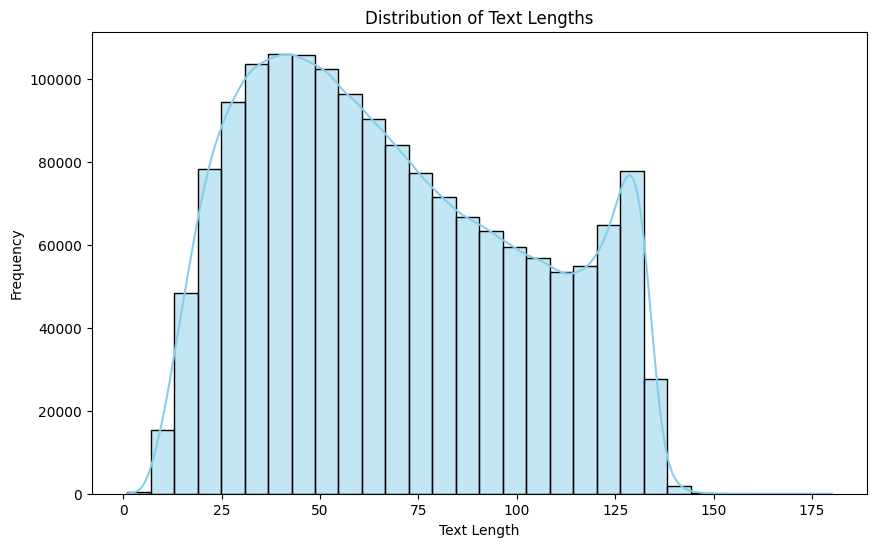

In [ ]:
# Check for missing values
print(data.isnull().sum())

# Add a new column for text length
data['text_length'] = data['cleaned_text'].apply(len)

# Visualize the distribution of text lengths
plt.figure(figsize=(10, 6))
sns.histplot(data['text_length'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()


<ipython-input-37-b74b69e20de2>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=common_words_df, palette='viridis')


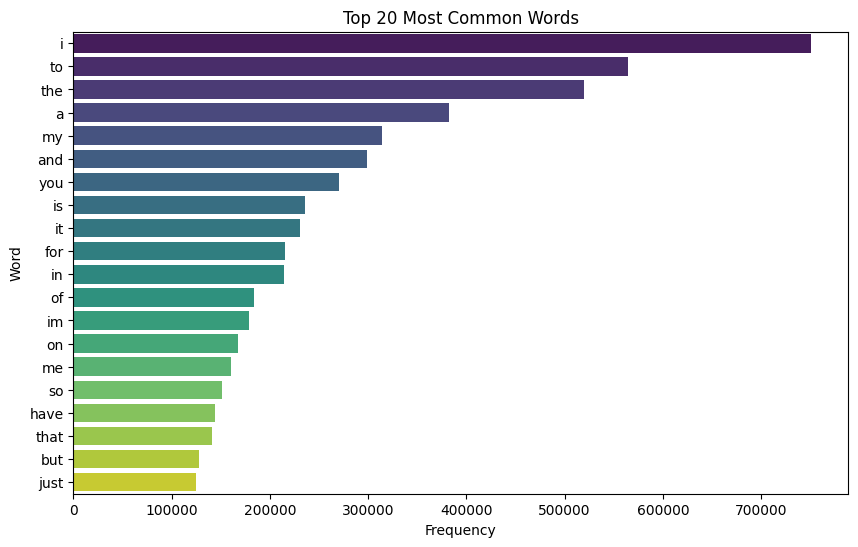

In [ ]:
from collections import Counter

# Tokenize words
all_words = ' '.join(data['cleaned_text']).split()
word_counts = Counter(all_words)
common_words = word_counts.most_common(20)

# Convert to DataFrame for visualization
common_words_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=common_words_df, palette='viridis')
plt.title('Top 20 Most Common Words')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()


<ipython-input-40-681a0c25eb7e>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Bigram', data=bigram_freq_df, palette='magma')


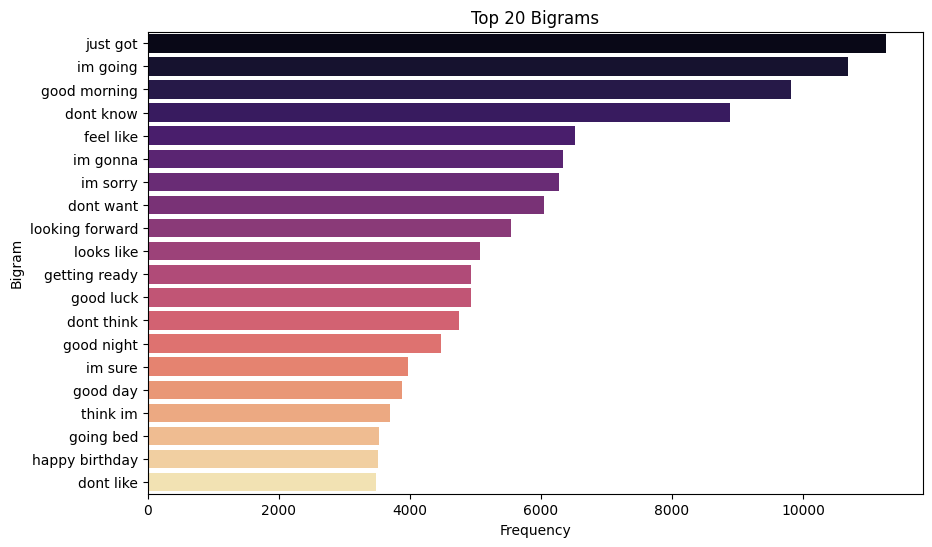

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Extract bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
bigrams = vectorizer.fit_transform(data['cleaned_text'])
bigram_counts = bigrams.sum(axis=0)

# Create a DataFrame for visualization
bigram_freq = [(word, bigram_counts[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
bigram_freq_df = pd.DataFrame(bigram_freq, columns=['Bigram', 'Frequency']).sort_values(by='Frequency', ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Bigram', data=bigram_freq_df, palette='magma')
plt.title('Top 20 Bigrams')
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.show()


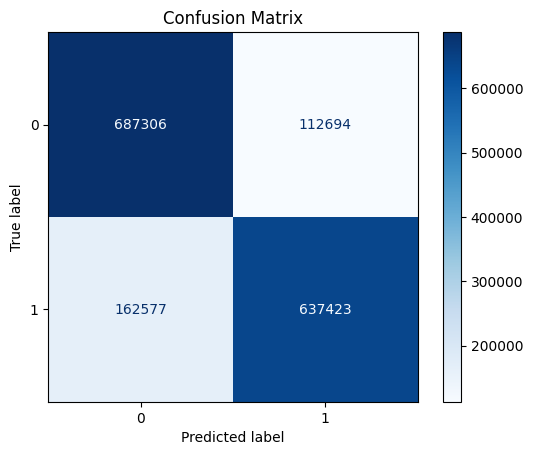

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming y_true are the true labels and y_pred are the predicted labels
y_true = data['sentiment']  # Replace with actual labels
y_pred = model.predict(data['cleaned_text'])  # Replace with your model's predictions

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
print(data['sentiment'].unique())


[0 4]


In [ ]:
# Example mapping, adjust based on your specific case
data['sentiment'] = data['sentiment'].replace({4: 1})  # Assuming 0 = negative, 4 = positive
y_true = data['sentiment']


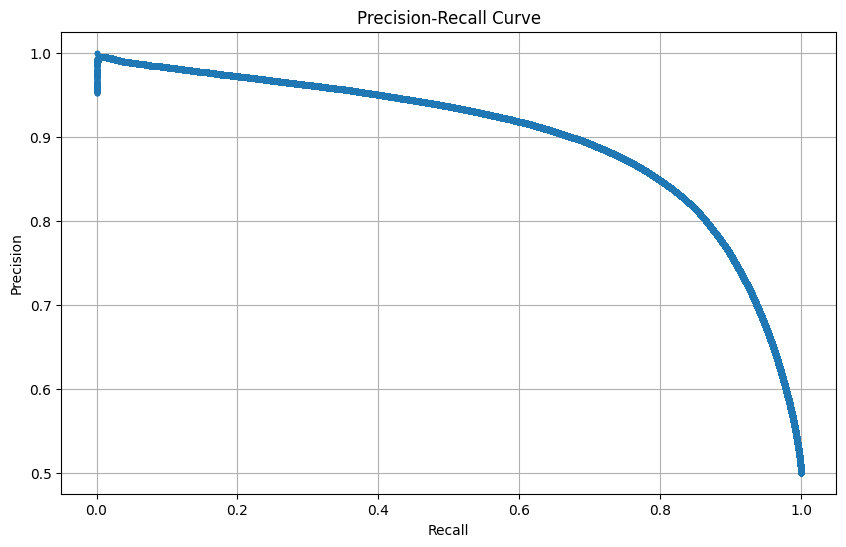

In [ ]:
from sklearn.metrics import precision_recall_curve

# Get predicted probabilities
y_probs = model.predict_proba(data['cleaned_text'])[:, 1]  # Ensure this reflects your model

precision, recall, _ = precision_recall_curve(y_true, y_probs)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid()
plt.show()


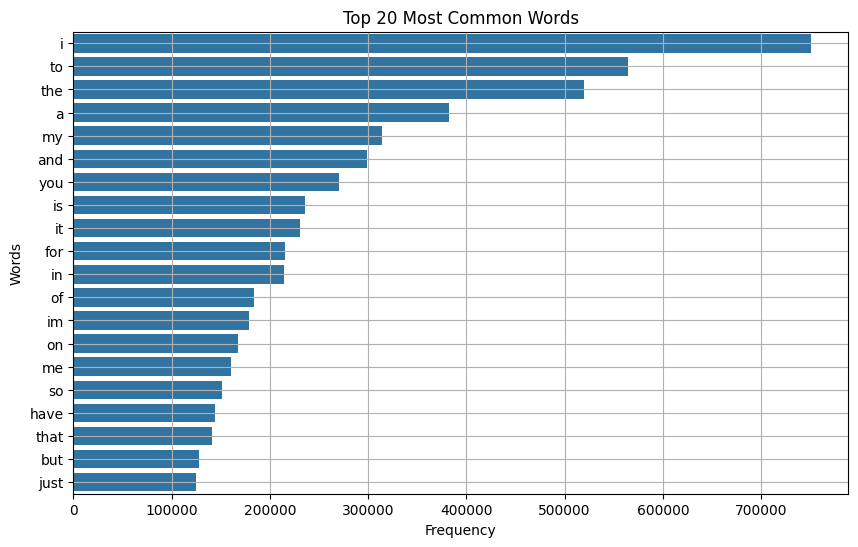

In [ ]:
from collections import Counter

# Combine all cleaned texts
all_text = ' '.join(data['cleaned_text'])
words = all_text.split()
word_freq = Counter(words).most_common(20)

# Plotting
words, counts = zip(*word_freq)
plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(words))
plt.title('Top 20 Most Common Words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.grid()
plt.show()


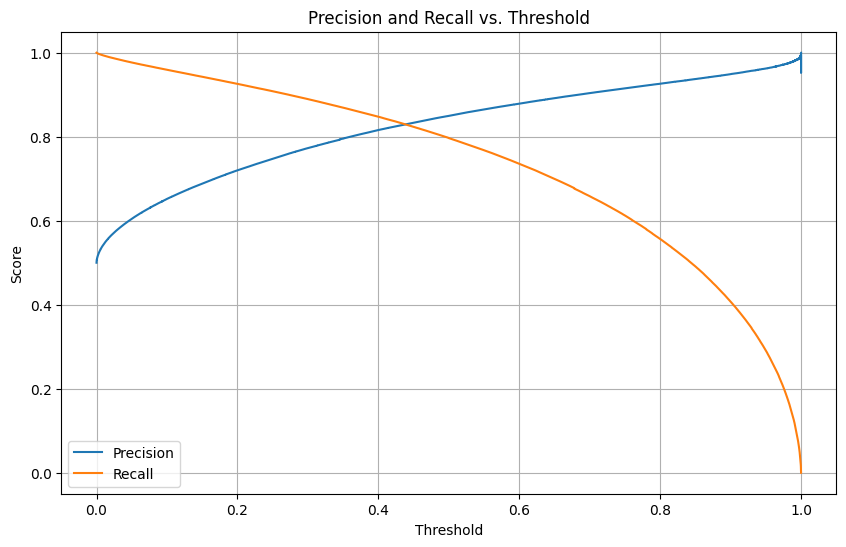

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_true, y_probs)

plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.title('Precision and Recall vs. Threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()


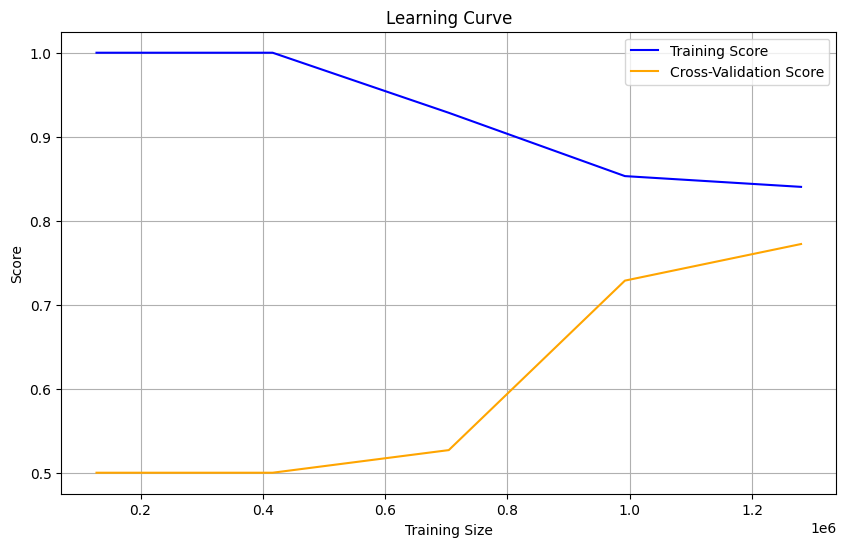

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, n_jobs=-1)

train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Score', color='blue')
plt.plot(train_sizes, test_scores_mean, label='Cross-Validation Score', color='orange')
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()


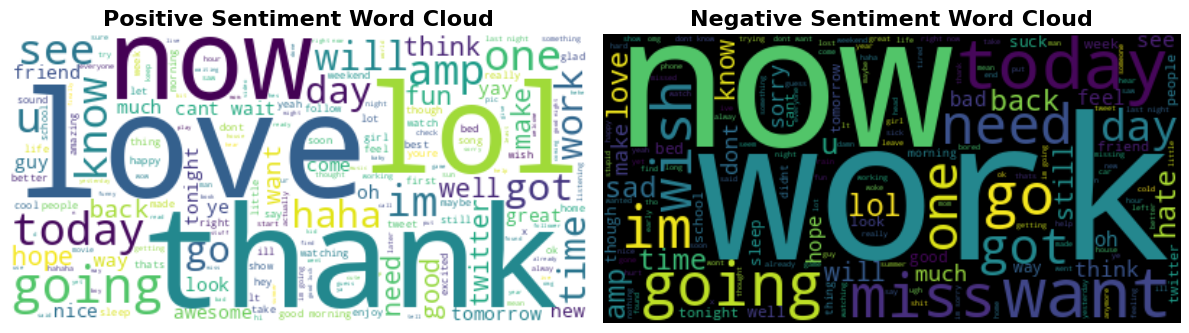

In [ ]:
positive_words = ' '.join(data[data['sentiment'] == 1]['cleaned_text'])
negative_words = ' '.join(data[data['sentiment'] == 0]['cleaned_text'])

positive_wordcloud = WordCloud(width=400, height=200, background_color='white').generate(positive_words)
negative_wordcloud = WordCloud(width=400, height=200, background_color='black').generate(negative_words)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Sentiment Word Cloud', fontsize=16, fontweight='bold')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Sentiment Word Cloud', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()


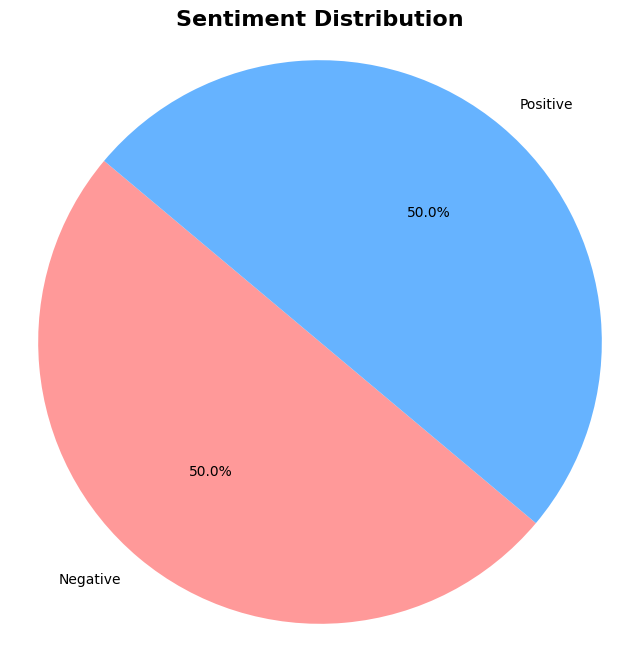

In [ ]:
# Count sentiments
sentiment_counts = data['sentiment'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=['Negative', 'Positive'], autopct='%1.1f%%', startangle=140, colors=['#FF9999', '#66B3FF'])
plt.title('Sentiment Distribution', fontsize=16, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is a circle.
plt.show()



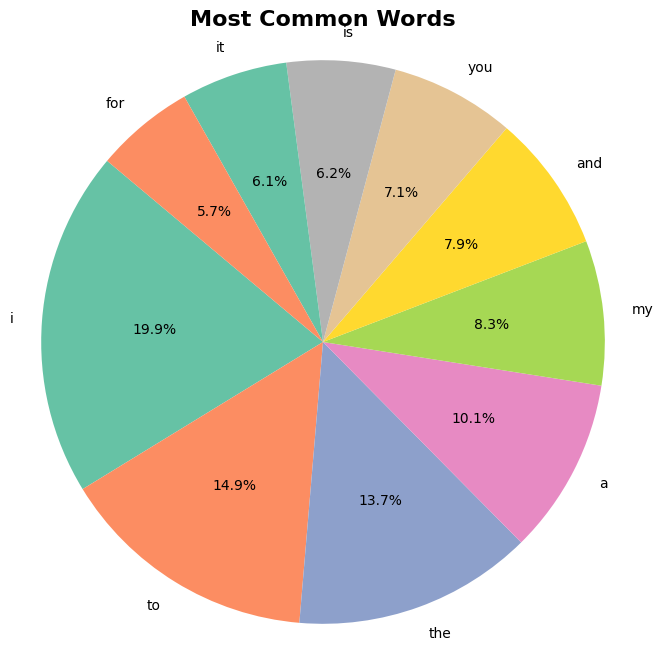

In [ ]:
from collections import Counter

# Get the most common words
all_words = ' '.join(data['cleaned_text'])
word_counts = Counter(all_words.split()).most_common(10)
words, counts = zip(*word_counts)

plt.figure(figsize=(8, 8))
plt.pie(counts, labels=words, autopct='%1.1f%%', startangle=140)
plt.title('Most Common Words', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.show()


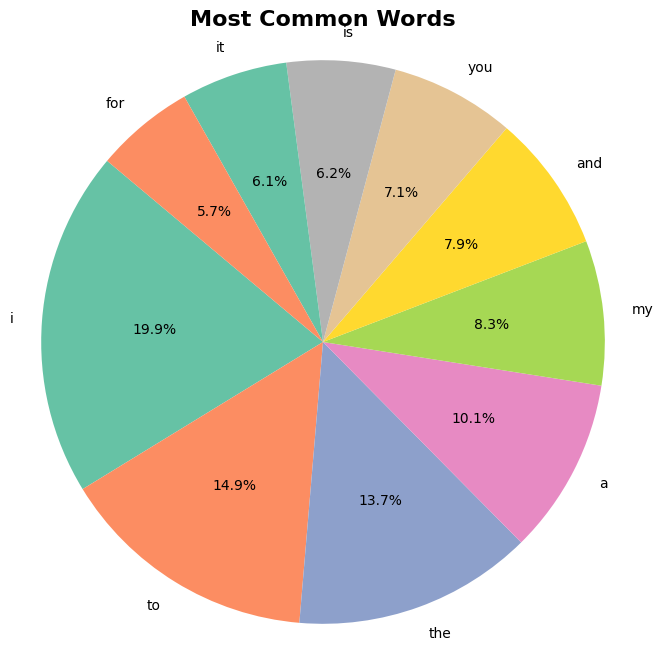

In [ ]:
from collections import Counter

# Get the most common words
all_words = ' '.join(data['cleaned_text'])
word_counts = Counter(all_words.split()).most_common(10)
words, counts = zip(*word_counts)

plt.figure(figsize=(8, 8))
plt.pie(counts, labels=words, autopct='%1.1f%%', startangle=140)
plt.title('Most Common Words', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.show()


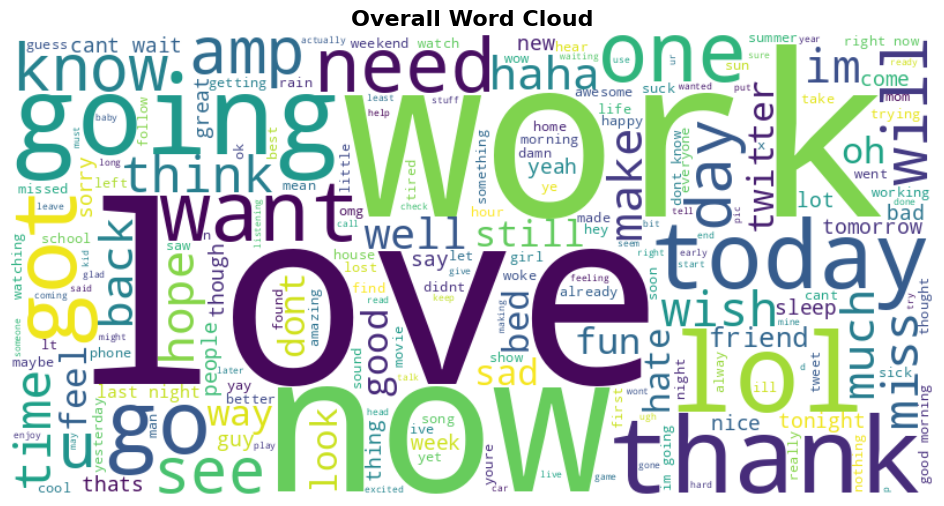

In [ ]:
from wordcloud import WordCloud

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Overall Word Cloud', fontsize=16, fontweight='bold')
plt.show()
